## Import libraries

In [391]:
import os
import pickle
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from skimage.feature import hog

## Get Path to data

In [538]:
path = 'english-alphabets_1'

## Check all folders in data path & join them

In [539]:
folders = []
for i in os.listdir(path):
    folders.append(os.path.join(path, i))

In [540]:
folders

['english-alphabets_1/M',
 'english-alphabets_1/X',
 'english-alphabets_1/J',
 'english-alphabets_1/V',
 'english-alphabets_1/W',
 'english-alphabets_1/Y',
 'english-alphabets_1/G',
 'english-alphabets_1/H',
 'english-alphabets_1/S',
 'english-alphabets_1/B',
 'english-alphabets_1/L',
 'english-alphabets_1/U',
 'english-alphabets_1/D',
 'english-alphabets_1/C',
 'english-alphabets_1/A',
 'english-alphabets_1/Z',
 'english-alphabets_1/I',
 'english-alphabets_1/R',
 'english-alphabets_1/T',
 'english-alphabets_1/K',
 'english-alphabets_1/F',
 'english-alphabets_1/E',
 'english-alphabets_1/O',
 'english-alphabets_1/P',
 'english-alphabets_1/Q',
 'english-alphabets_1/N']

## For every pics in each folder, join them

In [576]:
img_paths = []
for folder in folders:
    for img_path in os.listdir(folder):
        img_paths.append(os.path.join(folder, img_path))
#shuffle(img_paths)

In [577]:
#img_paths

In [578]:
len(img_paths)

6852

## Change images into Gray & change them into number arrays

In [579]:
data = []
for i in img_paths:
    im = cv2.imread(i)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = cv2.equalizeHist(im)
    im,thre = cv2.threshold(im,127,255, cv2.THRESH_BINARY)
    np_im = np.array(thre)
    data.append(np_im)

In [580]:
#data

## Find labels in each Image path

In [581]:
label = img_paths[0]

In [582]:
label

'english-alphabets_1/M/7179.jpg'

In [583]:
label.find('A')

-1

In [584]:
labels = []
for i in img_paths:
    labels.append(i[20])

## Change them into Ascii codes

In [585]:
labels = [ord(i) for i in labels]

In [586]:
#labels

## Check an Image

In [587]:
for index,label in enumerate(labels):
    if label == 88: # 88 is letter 'X' in Ascii code
        value = index
        break

In [588]:
value

262

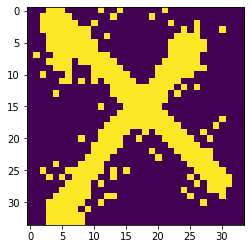

In [589]:
plt.imshow(data[value])

## Prepare data for training

In [590]:
data = np.array(data)

In [591]:
data.shape

(6852, 34, 34)

In [592]:
data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])

In [604]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.1, random_state=22)

In [605]:
train_data.shape

(6166, 1156)

In [606]:
model = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

In [607]:
#del model

## Train model

In [608]:
model.fit(train_data,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [609]:
y_pred1 = model.predict(test_data)

## Check accuracy of model

In [610]:
print("Accuracy :{:.2f}".format(100*accuracy_score(test_labels, y_pred1)) + '%')

Accuracy :86.44%


## Save model

In [614]:
pickle.dump(model, open('finalized_model1.sav', 'wb'))

# Use model & test

## Load model

In [1]:
import pickle
import os
import cv2
import numpy as np

In [616]:
model = pickle.load(open('finalized_model1.sav', 'rb'))

## Load test image, Pre-processing & Predict

In [617]:
test_samples = 'test_samples'
images = []
result_path = 'results'
for i in os.listdir(test_samples):
    images.append(os.path.join(test_samples, i))

In [618]:
images[0].find('2')

13

In [619]:
for i in images:
    label = i[13]
    img = cv2.imread(i)
    # Pre-processing
    if img.shape[0] > 1000 or img.shape[1] > 1000:
        img = cv2.resize(img, (700,700))
    elif img.shape[0] < 300 or img.shape[1] < 300:
        img = cv2.resize(img, (700,700))
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imshow('image', gray)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    blur = cv2.GaussianBlur(gray,(5,5),0)
    cv2.imshow('image', blur)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    im,thre = cv2.threshold(blur,127,255,cv2.THRESH_BINARY_INV)
    cv2.imshow('image', thre)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # find letters in images
    contours, hierachy = cv2.findContours(thre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    rects = [cv2.boundingRect(cnt) for cnt in contours]
    # predict letters
    #idx = 0
    for i in contours:
        (x,y,w,h) = cv2.boundingRect(i)
        if w > 15 and h > 15:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
            new_img=thre[y:y+h,x:x+w]
            new_img = cv2.resize(new_img,(34,34))
            #new_img = cv2.equalizeHist(new_img)
            #cv2.imwrite(str(idx) + '.png', new_img)
            #idx += 1
            np_img = np.array(new_img)
            np_img = np_img.reshape(-1,(34*34))
            pre = model.predict(np_img)
            pre = chr(pre)
            cv2.putText(img, pre, (x, y),cv2.FONT_HERSHEY_DUPLEX,1,(255,0,0),1)
    # show results
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # save results
    cv2.imwrite(os.path.join(result_path, label + '.jpg'), img)